<a href="https://colab.research.google.com/github/OmarKhaledAbdlhafez/Coursat.ai-Computer-vision/blob/master/Assignment3/covid_19_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive/covid

/content/gdrive/My Drive/covid


In [0]:
!ls

best_model.hdf5     images		   pneumonia_model.hdf5
covid_with_ft.hdf5  metadata.csv	   test
gmodel.hdf5	    pneumonia1_model.hdf5  train


In [0]:
import pandas as pd 
df = pd.read_csv('metadata.csv')

In [0]:
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 27
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [0]:
df.shape

(354, 28)

In [0]:
import os 
print(len(os.listdir('images/')))

345


In [0]:
df['finding'].value_counts()

COVID-19          278
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
ARDS                4
E.Coli              4
No Finding          3
Legionella          2
Chlamydophila       2
Klebsiella          1
Name: finding, dtype: int64

In [0]:
df.drop_duplicates(inplace=True)
df.shape


(354, 28)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               354 non-null    int64  
 1   offset                  258 non-null    float64
 2   sex                     311 non-null    object 
 3   age                     300 non-null    float64
 4   finding                 354 non-null    object 
 5   survival                109 non-null    object 
 6   intubated               71 non-null     object 
 7   intubation_present      61 non-null     object 
 8   went_icu                24 non-null     object 
 9   needed_supplemental_O2  6 non-null      object 
 10  extubated               16 non-null     object 
 11  temperature             28 non-null     float64
 12  pO2_saturation          37 non-null     float64
 13  leukocyte_count         9 non-null      float64
 14  neutrophil_count        2 non-null      fl

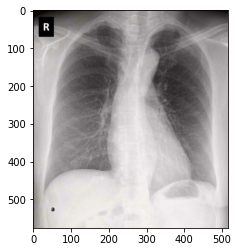

In [0]:
import cv2                 
import matplotlib.pyplot as plt
img= cv2.imread('images/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png')
plt.imshow(img)

In [0]:
covidfiles=[]
for idx, row in df.iterrows():
  t= row['finding']
  filename= row['filename']
  if t=='COVID-19' or t=='COVID-19, ARDS':
    covidfiles.append(filename) 

In [0]:
print(len(covidfiles))

290


In [0]:
def label_img(img):
  if img in covidfiles:
    return 1
  else :
    return 0  

In [0]:
import numpy as np         
import os  
import cv2              
from tqdm import tqdm 
from random import shuffle
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir('images')):
        label = label_img(img)
        path = os.path.join('images',img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img =cv2.resize(img, (256,256))
        training_data.append([np.array(img),label])
    shuffle(training_data)
    return training_data

In [0]:
data = create_train_data()

100%|██████████| 345/345 [03:56<00:00,  1.46it/s]


In [0]:
train = data[:-87]
test = data[-87:]
x_train = np.array([i[0] for i in train]).reshape(-1,256,256,1)
y_train = np.array([i[1] for i in train])

x_test = np.array([i[0] for i in test]).reshape(-1,256,256,1)
y_test =np.array([i[1] for i in test])

In [0]:
x_train.shape

(258, 256, 256, 1)

# **Frist train from skratch**

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 256)      

In [0]:
#from sklearn.utils import class_weight
#class_weight = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
model_hist=model.fit(x_train , y_train ,batch_size=32,epochs=20,validation_data=[x_test ,y_test])

Train on 258 samples, validate on 87 samples
Epoch 1/20
258/258 [==============================] - 1s 5ms/step - loss: 44.2908 - accuracy: 0.5891 - val_loss: 8.2964 - val_accuracy: 0.8046
Epoch 2/20
258/258 [==============================] - 1s 3ms/step - loss: 3.7883 - accuracy: 0.6550 - val_loss: 0.7020 - val_accuracy: 0.3563
Epoch 3/20
258/258 [==============================] - 1s 3ms/step - loss: 0.6169 - accuracy: 0.7519 - val_loss: 0.4928 - val_accuracy: 0.8046
Epoch 4/20
258/258 [==============================] - 1s 3ms/step - loss: 0.5440 - accuracy: 0.7713 - val_loss: 0.5969 - val_accuracy: 0.8046
Epoch 5/20
258/258 [==============================] - 1s 3ms/step - loss: 0.5816 - accuracy: 0.7829 - val_loss: 0.5234 - val_accuracy: 0.8161
Epoch 6/20
258/258 [==============================] - 1s 3ms/step - loss: 0.4804 - accuracy: 0.7829 - val_loss: 0.5529 - val_accuracy: 0.8276
Epoch 7/20
258/258 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.7984 - 

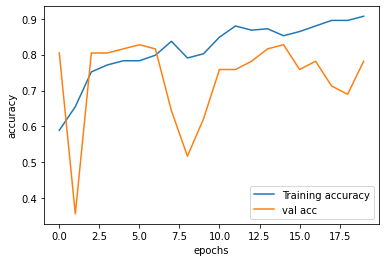

In [0]:
plt.plot(model_hist.history['accuracy'],label='Training accuracy')
plt.plot(model_hist.history['val_accuracy'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

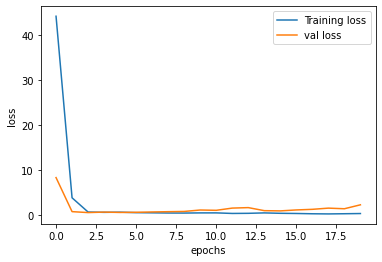

In [0]:
plt.plot(model_hist.history['loss'],label='Training loss')
plt.plot(model_hist.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# **try to do data augmentation to increase number of dataset**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagentrain = ImageDataGenerator(rescale=1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip=True)
datagentest=ImageDataGenerator(rescale=1./255)
train = datagentrain.flow(x_train , y_train , batch_size =32)
test = datagentest.flow(x_test, y_test ,batch_size =32)
model2_hist=model.fit_generator(train ,steps_per_epoch=20,epochs=20,validation_data=test,validation_steps=5)

Epoch 1/20
20/20 [==============================] - 3s 149ms/step - loss: 0.5375 - accuracy: 0.7709 - val_loss: 0.5288 - val_accuracy: 0.7947
Epoch 2/20
20/20 [==============================] - 3s 159ms/step - loss: 0.5364 - accuracy: 0.7639 - val_loss: 0.6510 - val_accuracy: 0.7887
Epoch 3/20
20/20 [==============================] - 3s 143ms/step - loss: 0.5388 - accuracy: 0.7818 - val_loss: 0.3806 - val_accuracy: 0.8310
Epoch 4/20
20/20 [==============================] - 3s 149ms/step - loss: 0.5456 - accuracy: 0.7741 - val_loss: 0.5417 - val_accuracy: 0.8079
Epoch 5/20
20/20 [==============================] - 3s 154ms/step - loss: 0.5463 - accuracy: 0.7569 - val_loss: 0.5610 - val_accuracy: 0.7676
Epoch 6/20
20/20 [==============================] - 3s 148ms/step - loss: 0.5130 - accuracy: 0.7707 - val_loss: 0.3700 - val_accuracy: 0.8028
Epoch 7/20
20/20 [==============================] - 3s 144ms/step - loss: 0.5150 - accuracy: 0.7690 - val_loss: 0.4817 - val_accuracy: 0.7881
Epoch 

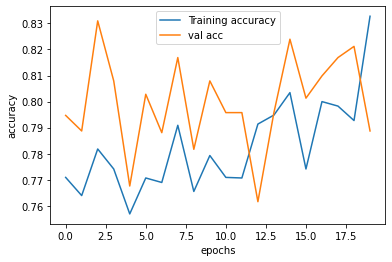

In [0]:
plt.plot(model2_hist.history['accuracy'],label='Training accuracy')
plt.plot(model2_hist.history['val_accuracy'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

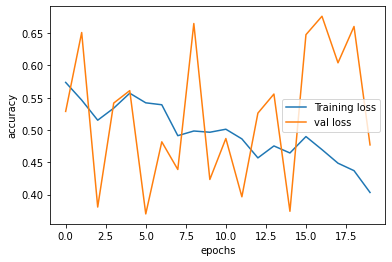

In [0]:
plt.plot(model2_hist.history['loss'],label='Training loss')
plt.plot(model2_hist.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Using transfer learning without fine tunning 
i use a kaggle [RSNA Pneumonia Detection Challenge](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge) i just use the dataset and apply a clssifiction on it u can check this work in those kernel 


*   [here](https://www.kaggle.com/omarkhald/rsna-classification)
*   [here](https://www.kaggle.com/omarkhald/rsna-classification-2)
i use this to do the transfer learning it get 77% accuracy 





In [0]:
from keras.models import load_model
pmodel = load_model('best_model.hdf5')
pmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 256)      

In [0]:
premodel_hist=pmodel.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=[x_test ,y_test])

Train on 258 samples, validate on 87 samples
Epoch 1/20
258/258 [==============================] - 8s 33ms/step - loss: 31.4039 - accuracy: 0.5194 - val_loss: 1.3250 - val_accuracy: 0.7931
Epoch 2/20
258/258 [==============================] - 1s 4ms/step - loss: 0.8787 - accuracy: 0.7403 - val_loss: 0.4815 - val_accuracy: 0.7931
Epoch 3/20
258/258 [==============================] - 1s 4ms/step - loss: 0.5588 - accuracy: 0.7752 - val_loss: 0.5271 - val_accuracy: 0.7931
Epoch 4/20
258/258 [==============================] - 1s 4ms/step - loss: 0.5005 - accuracy: 0.7791 - val_loss: 0.6229 - val_accuracy: 0.7816
Epoch 5/20
258/258 [==============================] - 1s 4ms/step - loss: 0.4814 - accuracy: 0.8023 - val_loss: 0.6654 - val_accuracy: 0.7816
Epoch 6/20
258/258 [==============================] - 1s 4ms/step - loss: 0.4106 - accuracy: 0.8217 - val_loss: 0.7003 - val_accuracy: 0.7126
Epoch 7/20
258/258 [==============================] - 1s 4ms/step - loss: 0.4250 - accuracy: 0.8488 -

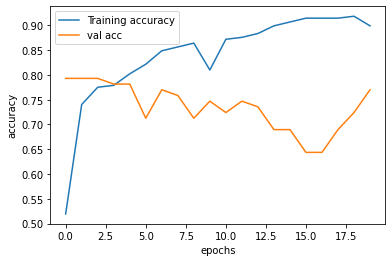

In [0]:
plt.plot(premodel_hist.history['accuracy'],label='Training accuracy')
plt.plot(premodel_hist.history['val_accuracy'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

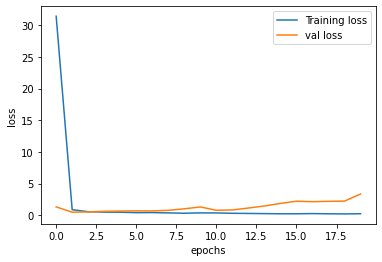

In [0]:
plt.plot(premodel_hist.history['loss'],label='Training loss')
plt.plot(premodel_hist.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagentrain = ImageDataGenerator(shear_range = 0.2,zoom_range = 0.2,horizontal_flip=True)
datagentest=ImageDataGenerator()
train = datagentrain.flow(x_train , y_train , batch_size =32)
test = datagentest.flow(x_test, y_test ,batch_size =32)
pmodel_hist=pmodel.fit_generator(train ,steps_per_epoch=20,epochs=20,validation_data=test,validation_steps=3)

Epoch 1/20
20/20 [==============================] - 3s 172ms/step - loss: 0.9590 - accuracy: 0.7293 - val_loss: 0.4412 - val_accuracy: 0.7931
Epoch 2/20
20/20 [==============================] - 3s 162ms/step - loss: 0.5300 - accuracy: 0.7818 - val_loss: 0.8840 - val_accuracy: 0.7701
Epoch 3/20
20/20 [==============================] - 3s 165ms/step - loss: 1.6553 - accuracy: 0.7759 - val_loss: 0.5852 - val_accuracy: 0.7816
Epoch 4/20
20/20 [==============================] - 3s 169ms/step - loss: 0.6041 - accuracy: 0.7655 - val_loss: 0.6877 - val_accuracy: 0.7931
Epoch 5/20
20/20 [==============================] - 3s 172ms/step - loss: 0.5759 - accuracy: 0.7707 - val_loss: 0.5027 - val_accuracy: 0.7816
Epoch 6/20
20/20 [==============================] - 3s 168ms/step - loss: 0.5171 - accuracy: 0.7793 - val_loss: 0.5454 - val_accuracy: 0.7931
Epoch 7/20
20/20 [==============================] - 3s 164ms/step - loss: 0.4962 - accuracy: 0.7707 - val_loss: 0.6478 - val_accuracy: 0.8046
Epoch 

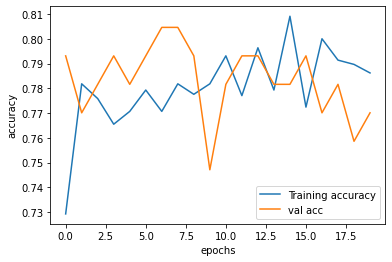

In [0]:
plt.plot(pmodel_hist.history['accuracy'],label='Training accuracy')
plt.plot(pmodel_hist.history['val_accuracy'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

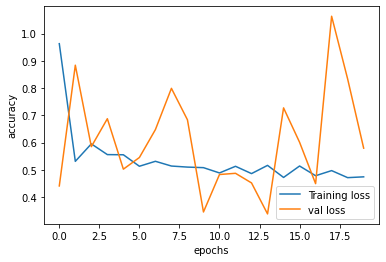

In [0]:
plt.plot(pmodel_hist.history['loss'],label='Training loss')
plt.plot(pmodel_hist.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Do fine tunning 
now we will fine tune the all the dense layers ( decision layers) and will train it 

In [0]:
for layer in pmodel.layers:
    if layer.name == 'dense_3'or layer.name == 'dense_2' or layer.name == 'dense_1' :
      layer.trainable = True
    else:
        layer.trainable = False
pmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
pmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 256)      

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(shear_range = 0.2,zoom_range = 0.2,horizontal_flip=True)
train = datagen.flow(x_train , y_train , batch_size =32)
test = datagen.flow(x_test, y_test ,batch_size =32)
fmodel2=pmodel.fit_generator(train ,steps_per_epoch=10,epochs=20,validation_data=test,validation_steps=3)

Epoch 1/20
10/10 [==============================] - 2s 195ms/step - loss: 0.4535 - acc: 0.7966 - val_loss: 0.2997 - val_acc: 0.7586
Epoch 2/20
10/10 [==============================] - 2s 169ms/step - loss: 0.5077 - acc: 0.8000 - val_loss: 0.4418 - val_acc: 0.7241
Epoch 3/20
10/10 [==============================] - 2s 167ms/step - loss: 0.4893 - acc: 0.8207 - val_loss: 1.0229 - val_acc: 0.7356
Epoch 4/20
10/10 [==============================] - 2s 153ms/step - loss: 0.4666 - acc: 0.8385 - val_loss: 1.0845 - val_acc: 0.8046
Epoch 5/20
10/10 [==============================] - 2s 164ms/step - loss: 0.6142 - acc: 0.7828 - val_loss: 1.0989 - val_acc: 0.8046
Epoch 6/20
10/10 [==============================] - 2s 186ms/step - loss: 0.4628 - acc: 0.7969 - val_loss: 0.6167 - val_acc: 0.7586
Epoch 7/20
10/10 [==============================] - 2s 156ms/step - loss: 0.4586 - acc: 0.8077 - val_loss: 0.9293 - val_acc: 0.7701
Epoch 8/20
10/10 [==============================] - 2s 167ms/step - loss: 0.

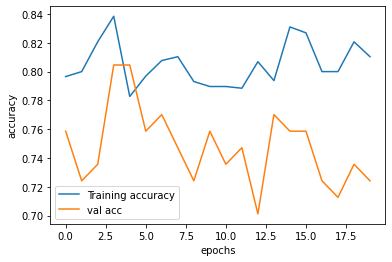

In [0]:
plt.plot(fmodel2.history['acc'],label='Training accuracy')
plt.plot(fmodel2.history['val_acc'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

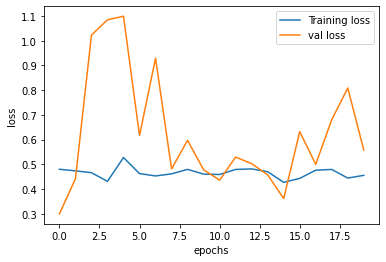

In [0]:
plt.plot(fmodel2.history['loss'],label='Training loss')
plt.plot(fmodel2.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
pmodel.save('covid2_with_ft.hdf5')
covid_model= load_model('covid2_with_ft.hdf5')
from keras import models
layer_outputs = [layer.output for layer in covid_model.layers[:8]]
activation_model = models.Model(inputs=covid_model.input, outputs=layer_outputs)
activation_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0   

In [0]:
from keras.preprocessing import image
path= 'images/'+covidfiles[100]
img=image.load_img(path,target_size=(256, 256),grayscale=True)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)

(1, 256, 256, 1)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


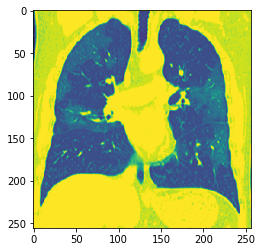

In [0]:
plt.imshow(img)
plt.show()

In [0]:
activations = activation_model.predict(img_tensor)
print(len(activations))

8


In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 254, 254, 32)


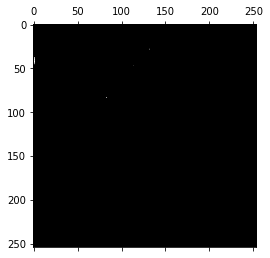

In [0]:
plt.matshow(first_layer_activation[0, :, :, 10],cmap='gray')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


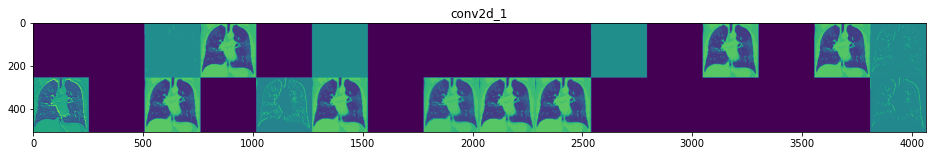

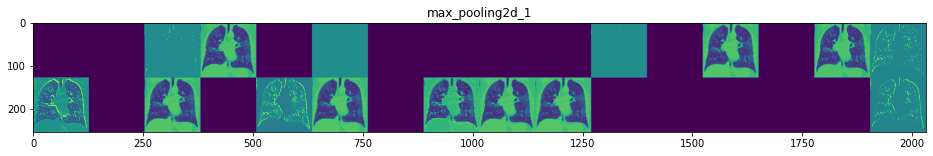

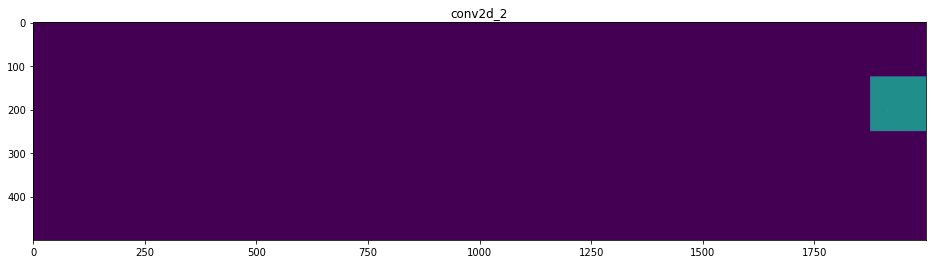

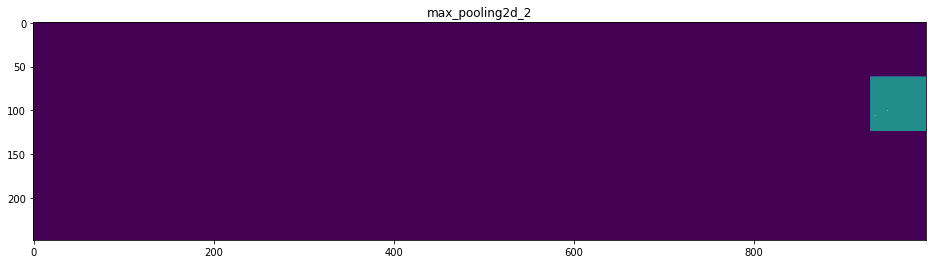

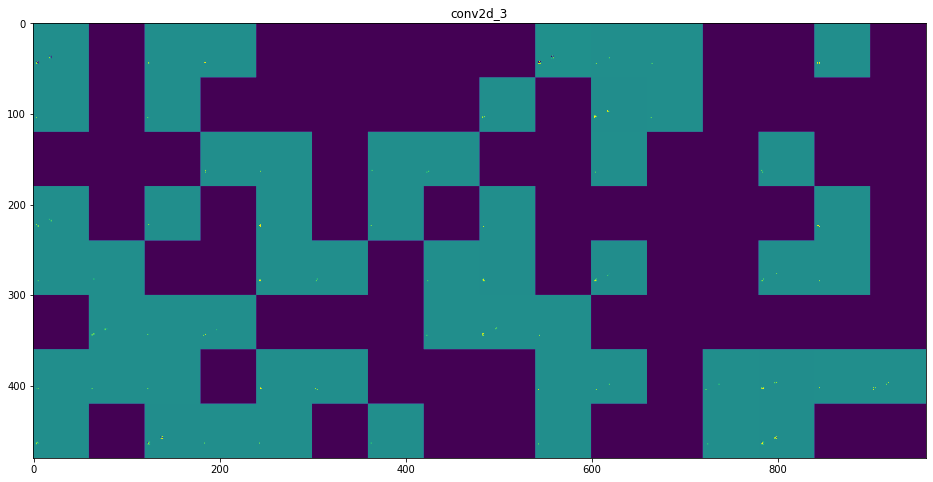

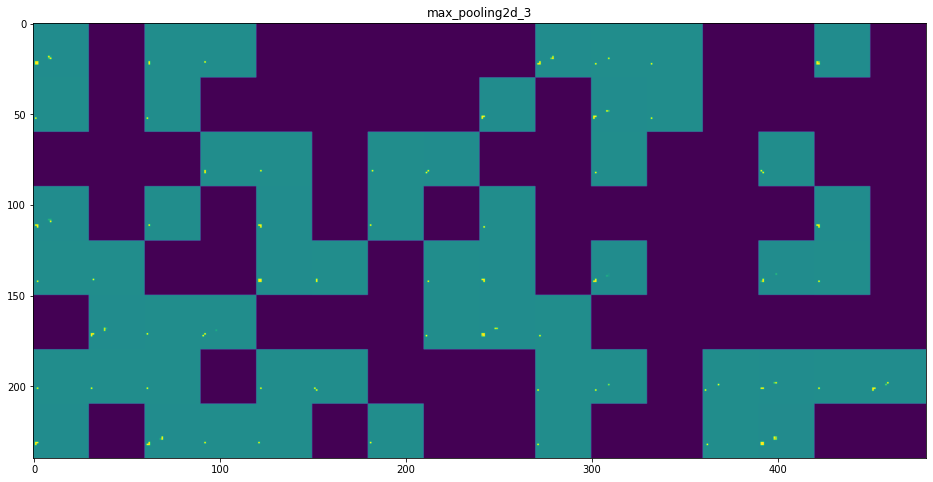

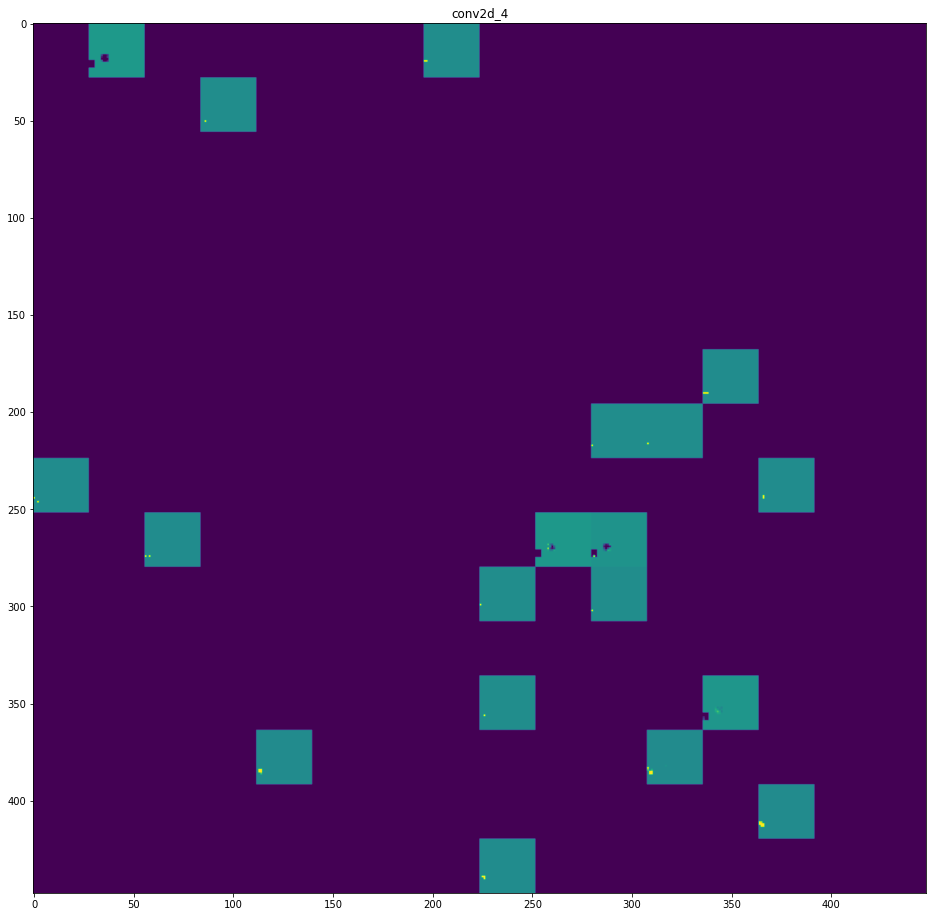

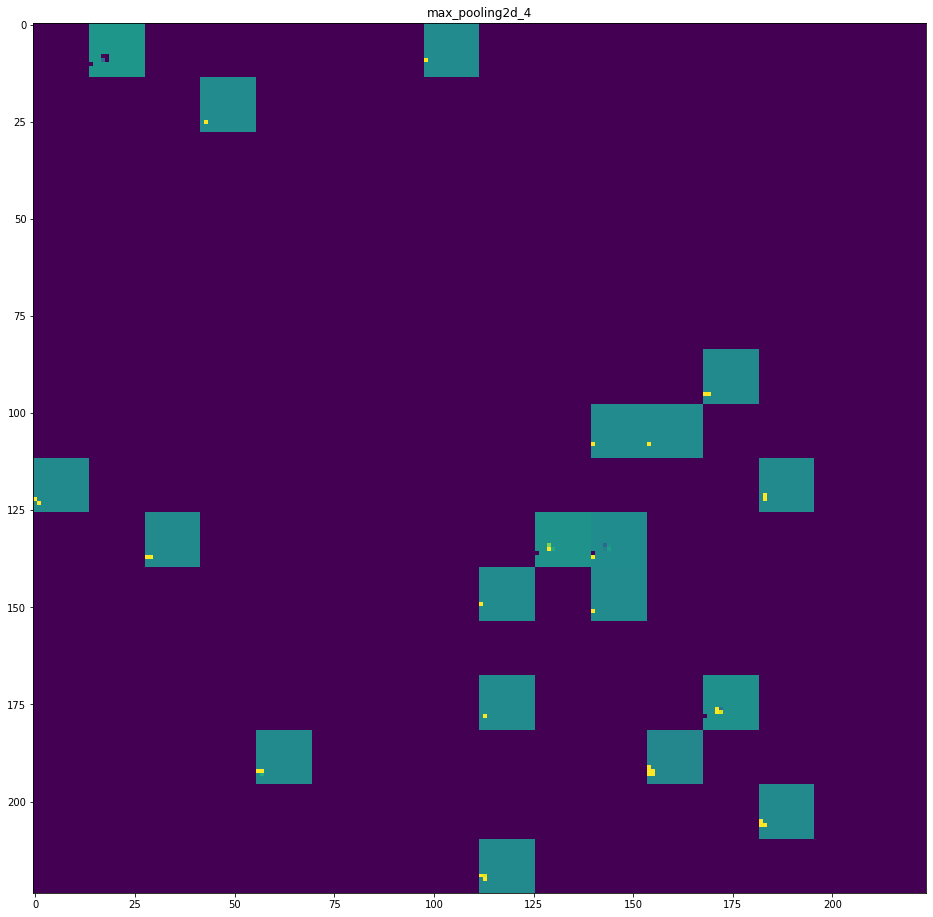

In [0]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()